In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importing the test and train data set 
train=pd.read_csv('/content/drive/My Drive/DS Datasets/train.csv')
test=pd.read_csv('/content/drive/My Drive/DS Datasets/test.csv')
gender=pd.read_csv('/content/drive/My Drive/DS Datasets/gender_submission.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
pip install pandas-profiling

In [ ]:
#import pandas_profiling as pp
#pp.ProfileReport(train)

In [ ]:
# Check basics about train, test, gender dataset
print(train.shape)
print(test.shape)
print(gender.shape)

(891, 12)
(418, 11)
(418, 2)


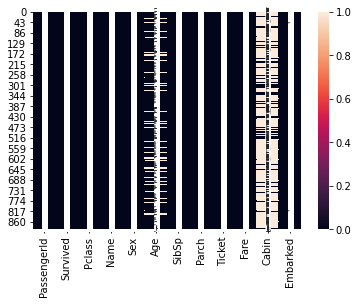

In [ ]:
#checking for the presence of null values for train dataset using heatmap
sns.heatmap(train.isnull(), annot= True)
plt.show()

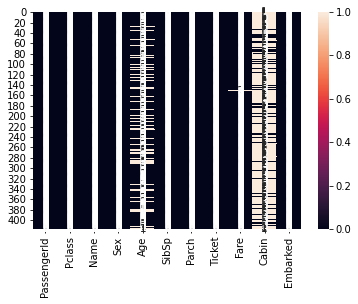

In [ ]:
#checking for the presence of null values for test dataset using heatmap
sns.heatmap(test.isnull(), annot= True)
plt.show()

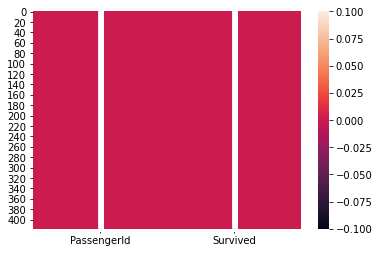

In [ ]:
#checking the values for gender dataset using heatmap
sns.heatmap(gender.isnull(), annot= True)
plt.show()

In [ ]:
#checking for null values without visualization for train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#checking for null values without visualization for test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#checking for null values without visualization for gender dataset
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [ ]:
#checking for outliers present in the dataset if any
#from scipy.stats import zscore
#z_score=abs(zscore(train))
#print(train.shape)
#train_final=train.loc[(z_score<3).all(axis=1)]
#print(train_final)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

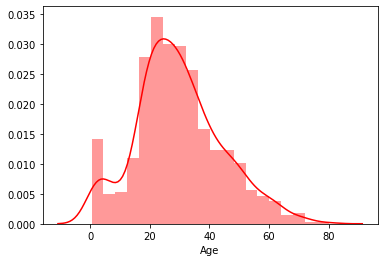

In [ ]:
#Distribution of age
sns.distplot(train[pd.notnull(train.Age)]['Age'],color='red')

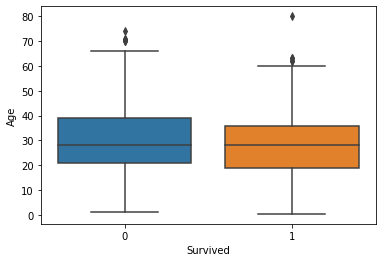

In [ ]:
#Plot between the age and survied column

sns.boxplot(x=train['Survived'],y=train['Age'])

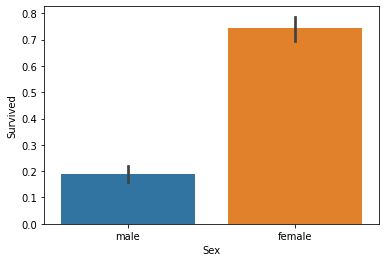

In [ ]:
#Plot between the gender and survied column

sns.barplot(x=train['Sex'],y=train['Survived'])

In [ ]:
#Checking the skewness of train Dataset
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [ ]:
#Checking the skewness of test Dataset
test.skew()

PassengerId    0.000000
Pclass        -0.534170
Age            0.457361
SibSp          4.168337
Parch          4.654462
Fare           3.687213
dtype: float64

In [ ]:
#Checking the skewness of gender Dataset
gender.skew()

PassengerId    0.000000
Survived       0.568991
dtype: float64

In [ ]:
#Considering female as 1 else 0 in the test data

def female_surv(x):
    if(x=="female"):
        return (1)
    else:
        return(0)

In [ ]:
femalesurvived=test.Sex.apply(female_surv)
# First Model everybody died: Base Model
solution=pd.DataFrame({"PassengerId":test.PassengerId,"Survived":femalesurvived})
# Export the solution to outside python
solution.to_csv('All Females Survived.csv', index=False)

In [ ]:
#Dropping the variables
newtrain=train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
newtest=test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
newgender=gender.drop(['PassengerId', 'Survived'], axis=1)

In [ ]:
newtrain.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
newtest.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [ ]:
newtest.Age.fillna(value=27,inplace=True)

In [ ]:
newtrain.Age.fillna(value=28,inplace=True)

In [ ]:
newtest.Fare.fillna(value=14.454200,inplace=True)

In [ ]:
newtrain.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
newtrain.Embarked.fillna(value='S',inplace=True)

In [ ]:
newtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
newtrain.shape

(891, 8)

In [ ]:
newtest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#Converted into one hot encoding
dummytrain=pd.get_dummies(newtrain)
dummytrain.shape

(891, 11)

In [ ]:
dummytest=pd.get_dummies(newtest)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# Apply standard SDcalar
scaled_train=pd.DataFrame(sc.fit_transform(dummytrain.drop('Survived',axis=1)),
columns=dummytrain.columns.drop('Survived'))
scaled_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [ ]:
scaled_test=pd.DataFrame(sc.fit_transform(dummytest),columns=dummytest.columns)
scaled_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,-0.755929,0.755929,-0.568142,2.843757,-1.350676
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,1.322876,-1.322876,-0.568142,-0.351647,0.740370
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,-0.755929,0.755929,-0.568142,2.843757,-1.350676
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,-0.755929,0.755929,-0.568142,-0.351647,0.740370
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,1.322876,-1.322876,-0.568142,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,-0.755929,0.755929,-0.568142,-0.351647,0.740370
414,-1.505120,0.740881,-0.499470,-0.400248,1.314435,1.322876,-1.322876,1.760125,-0.351647,-1.350676
415,0.873482,0.701476,-0.499470,-0.400248,-0.507796,-0.755929,0.755929,-0.568142,-0.351647,0.740370
416,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,-0.755929,0.755929,-0.568142,-0.351647,0.740370


In [ ]:
xtrain=scaled_train
ytrain=train.Survived
xtest=scaled_test

In [ ]:
xtrain.shape

(891, 10)

In [ ]:
ytrain.shape

(623,)

In [ ]:
xtest.shape

(268, 10)

In [ ]:
# KNn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
pred=knn.fit(xtrain,ytrain).predict(xtest)

In [ ]:
x=scaled_train
y=train.Survived

In [ ]:
x.shape

(891, 10)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=123)

In [ ]:
from sklearn.metrics import accuracy_score,cohen_kappa_score
accuracy_score(ytest,pred)

0.8208955223880597

In [ ]:
cohen_kappa_score(ytest,pred)

0.6139255702280912

In [ ]:
#Applying Decision Tree Model for prediction
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy")
pred_d=dtree.fit(xtrain,ytrain).predict(xtest)

In [ ]:
accuracy_score(ytest,pred_d)

0.7686567164179104

In [ ]:
cohen_kappa_score(ytest,pred_d)

0.548368022705771

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
xgbrf=XGBRFClassifier()

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))
models.append(('Ada Boost Classifier',adb))
models.append(('Gradient Boosting Classifier',gbc))
models.append(('XGB Classifier',xgb))
models.append(('XGBRF Classifier',xgbrf))

In [ ]:
from sklearn import model_selection

Decision Tree: 0.793521 (0.001278)
Decision Tree with Gini Coefficient: 0.792360 (0.000994)
K Nearest Neighbors: 0.801361 (0.000550)
Naive Bayes: 0.785680 (0.000492)
Random Forrest: 0.807029 (0.000968)
Random Forrest with Gini Coefficient: 0.805905 (0.001000)
Bagging Classifier: 0.801361 (0.000424)
Ada Boost Classifier: 0.805893 (0.001109)
Gradient Boosting Classifier: 0.824944 (0.001003)
XGB Classifier: 0.824956 (0.000972)
XGBRF Classifier: 0.814819 (0.001494)


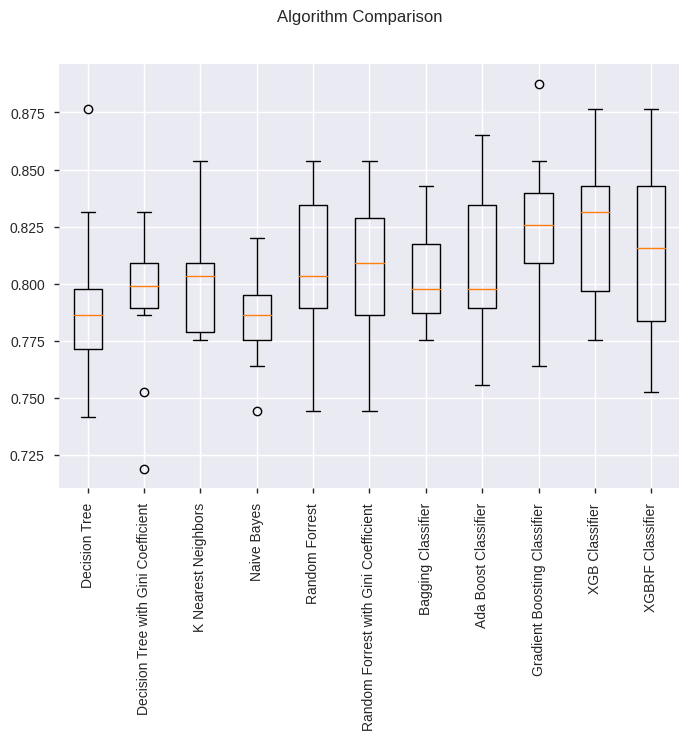

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()